In [1]:
from scipy import io
import numpy as np
import json
import matplotlib.pyplot as plt 
import json


In [2]:
data = io.loadmat("../ITER_like_equilibrium_dataset.mat")

In [3]:
for k,v in data.items():
    if "__" not in k:
        print(f"{k}: shape: {v.shape}")

DB_meas_Bpickup_test_ConvNet: shape: (81986, 187)
DB_psi_pixel_test_ConvNet: shape: (81986, 64, 64)
DB_res_RHS_pixel_test_ConvNet: shape: (81986, 64, 64)
DB_Jpla_pixel_test_ConvNet: shape: (81986, 64, 64)
DB_coils_curr_test_ConvNet: shape: (81986, 14)
RR_pixels: shape: (64, 64)
ZZ_pixels: shape: (64, 64)
DB_separatrix_200_test_ConvNet: shape: (81986, 200, 2)
XP_YN: shape: (1, 81986)
DB_f_test_ConvNet: shape: (81986, 101)
DB_p_test_ConvNet: shape: (81986, 101)


In [4]:
mag_measures = data['DB_meas_Bpickup_test_ConvNet']
flux = data['DB_psi_pixel_test_ConvNet']
rhx = data['DB_res_RHS_pixel_test_ConvNet']
jpla = data['DB_Jpla_pixel_test_ConvNet']
coils_current = data['DB_coils_curr_test_ConvNet']
separatrix = data['DB_separatrix_200_test_ConvNet']
id_diverted = data['XP_YN'].reshape(-1,1)
f_prpofile = data['DB_f_test_ConvNet']
p_profile = data['DB_p_test_ConvNet']

In [5]:
data_dict = {
    'mag_measures' : mag_measures,
    'flux' : flux,
    'rhs' : rhx,
    'coils_current' : coils_current,
    'separatrix' : separatrix,
    'id_diverted' : id_diverted,
    'p_profile' : p_profile,   
}

# isel = 512
# data_dict = {k:v[:isel, ...] for k,v in data_dict.items()}

for k,v in data_dict.items():
    if "__" not in k:
        print(f"{k}: shape: {v.shape}")

mag_measures: shape: (81986, 187)
flux: shape: (81986, 64, 64)
rhs: shape: (81986, 64, 64)
coils_current: shape: (81986, 14)
separatrix: shape: (81986, 200, 2)
id_diverted: shape: (81986, 1)
p_profile: shape: (81986, 101)


In [6]:
from datasets import Dataset


ds = Dataset.from_dict(data_dict)
ds = ds.with_format("numpy")

/Users/matte/Documents/RESEARCH/ITERlike_equilibrium_dataset/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
ds.push_to_hub("matteobonotto/iterlike_equil")

Uploading the dataset shards: 100%|██████████| 12/12 [45:24<00:00, 227.00s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/matteobonotto/iterlike_equil/commit/5e1d4579224006847edd098101b74f386dd83601', commit_message='Upload dataset', commit_description='', oid='5e1d4579224006847edd098101b74f386dd83601', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/matteobonotto/iterlike_equil', endpoint='https://huggingface.co', repo_type='dataset', repo_id='matteobonotto/iterlike_equil'), pr_revision=None, pr_num=None)

In [8]:
data_dict = {
    'mag_measures' : mag_measures,
    'flux' : flux,
    'rhs' : rhx,
    'coils_current' : coils_current,
    'separatrix' : separatrix,
    'id_diverted' : id_diverted,
    'p_profile' : p_profile,   
}

isel = 8192
data_dict = {k:v[:isel, ...] for k,v in data_dict.items()}

for k,v in data_dict.items():
    if "__" not in k:
        print(f"{k}: shape: {v.shape}")

mag_measures: shape: (8192, 187)
flux: shape: (8192, 64, 64)
rhs: shape: (8192, 64, 64)
coils_current: shape: (8192, 14)
separatrix: shape: (8192, 200, 2)
id_diverted: shape: (8192, 1)
p_profile: shape: (8192, 101)


In [9]:
ds = Dataset.from_dict(data_dict)
ds = ds.with_format("numpy")
ds.push_to_hub("matteobonotto/iterlike_equil_sample")

Uploading the dataset shards: 100%|██████████| 2/2 [04:31<00:00, 135.65s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/matteobonotto/iterlike_equil_sample/commit/683d70bbde4817fbfc83127dee2fcc9d5bfb6261', commit_message='Upload dataset', commit_description='', oid='683d70bbde4817fbfc83127dee2fcc9d5bfb6261', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/matteobonotto/iterlike_equil_sample', endpoint='https://huggingface.co', repo_type='dataset', repo_id='matteobonotto/iterlike_equil_sample'), pr_revision=None, pr_num=None)

In [43]:
samples = []
for i in range(mag_measures.shape[0]):
    sample = {key: value[i] for key, value in data_dict.items()}
    samples.append(sample)

IndexError: index 512 is out of bounds for axis 0 with size 512

In [34]:
from datasets import Dataset
hf_dataset = Dataset.from_list(samples)

/Users/matte/Documents/RESEARCH/ITERlike_equilibrium_dataset/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [3]:
d = io.loadmat('../INPUT_ITER_shape.mat')

first_wall = {
    'r': d['geometry'][0][0][0][:,0].tolist(),
    'z': d['geometry'][0][0][0][:,1].tolist(),
}
json.dump(first_wall, open('../iterlike_dataset/data/first_wall.json', 'w'))

In [27]:
grid = {
    'r': data['RR_pixels'].tolist(),
    'z' : data['ZZ_pixels'].tolist()
}
json.dump(grid, open('../iterlike_dataset/data/grid.json', 'w'))



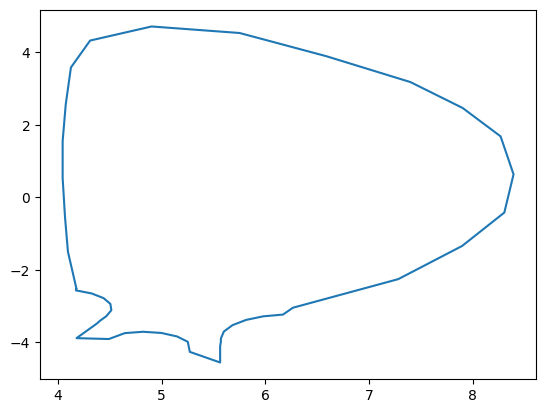

In [21]:


fig = plt.Figure()
plt.plot(d['geometry'][0][0][0][:,0], d['geometry'][0][0][0][:,1])
plt.show()

In [20]:
d['geometry'][0][0][0][:,0]

array([4.1761    , 4.1742    , 4.19318496, 4.21216992, 4.23685038,
       4.26153083, 4.29361541, 4.3257    , 4.35072174, 4.37574348,
       4.40827174, 4.4408    , 4.45510435, 4.4694087 , 4.48800435,
       4.5066    , 4.51115   , 4.5157    , 4.50193696, 4.48817391,
       4.47758696, 4.467     , 4.44987391, 4.43274783, 4.41957391,
       4.4064    , 4.39185   , 4.3773    , 4.36299565, 4.3486913 ,
       4.33009565, 4.3115    , 4.29505   , 4.2786    , 4.26215   ,
       4.2457    , 4.2128    , 4.1799    , 4.24310962, 4.30631924,
       4.35754527, 4.4087713 , 4.45028565, 4.4918    , 4.53025   ,
       4.5687    , 4.60715   , 4.6456    , 4.68383913, 4.72207826,
       4.77178913, 4.8215    , 4.90985   , 4.9982    , 5.03111304,
       5.06402609, 5.10681304, 5.1496    , 5.20125   , 5.2529    ,
       5.25785   , 5.2628    , 5.26775   , 5.2727    , 5.30799405,
       5.3432881 , 5.38917037, 5.43505264, 5.50002632, 5.565     ,
       5.565     , 5.565     , 5.565     , 5.565     , 5.565  

In [9]:
del data['__header__']
del data['__version__']
del data['__globals__']

In [12]:
from helper_functions.data import write_h5, read_h5_numpy


write_h5(
        data = data,
        filename = 'ITER_like_equilibrium_dataset',
        compression = 'lzf',
        compression_opts = 2,
        chunk_1st_dim = 1,
        verbose = True
        )

Processing key: DB_meas_Bpickup_test_ConvNet, dims: (81986, 187), size: 0.00MB


In [9]:
path = '../../ITER_like_equilibrium_dataset.mat'
data = io.loadmat(path)
io.savemat('test.mat',data)

In [8]:
data

{'DB_meas_Bpickup_test_ConvNet': array([[-0.17868029, -0.16789426, -0.08512396, ...,  0.12358788,
          0.19602617,  0.09686655],
        [-0.14085191, -0.12277286, -0.06658557, ...,  0.11279119,
          0.18166838,  0.08354231],
        [-0.17679394, -0.21120421, -0.13034806, ...,  0.10747951,
          0.17094918,  0.07693901],
        ...,
        [-0.3481648 , -0.17522779,  0.05687848, ...,  0.24575821,
          0.3028438 ,  0.15168116],
        [-0.3481648 , -0.17522779,  0.05687848, ...,  0.24575821,
          0.3028438 ,  0.15168116],
        [-0.31627581, -0.17361473,  0.0450843 , ...,  0.23974301,
          0.30019407,  0.15113343]]),
 'DB_psi_pixel_test_ConvNet': array([[[ 11.34038821,  11.50091029,  11.65267634, ...,   5.45076873,
            5.28322235,   5.12250285],
         [ 11.16700506,  11.31014122,  11.44590218, ...,   5.78350233,
            5.62025665,   5.46245223],
         [ 11.03638575,  11.16304047,  11.28364092, ...,   6.086616  ,
            5.9272412